Plot saved successfully as Real_GDP_by_Mesoregion.jpg


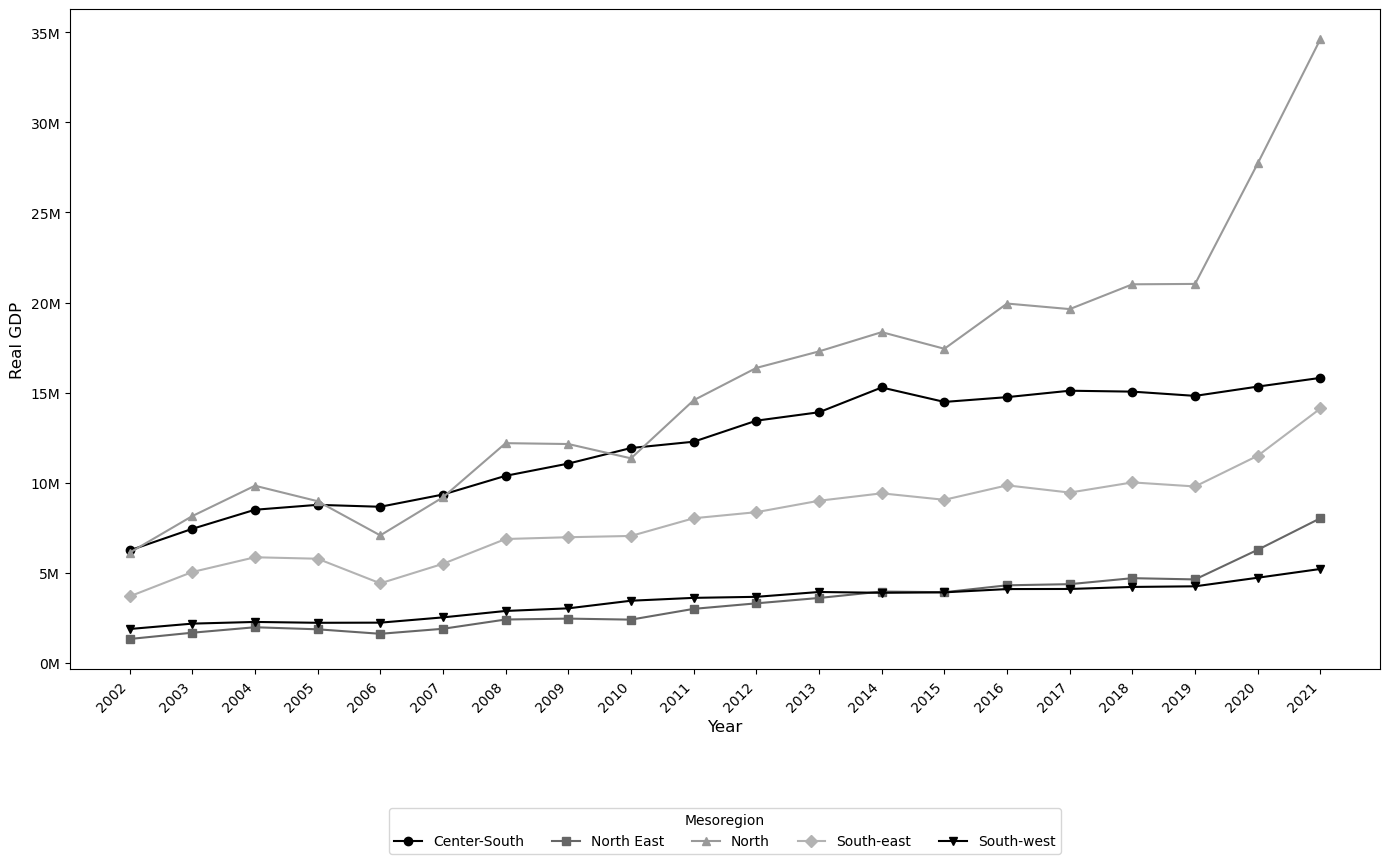

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

# --- Data Extraction ---
# Path to your Excel file and the specific sheet name
file_path = 'PIB Municipal/PIB Mesorregional.xlsx'
sheet_name = 'Plotting'

# Read the data from the specified sheet in the Excel file.
# We set the first column ('Mesoregion') as the index for the DataFrame.
df = pd.read_excel(file_path, sheet_name=sheet_name, index_col=0)

# Drop the 'Total' row if it exists to avoid skewing the plot scale
if 'Total' in df.index:
    df = df.drop('Total')

# --- Plotting ---
# Set the plot style to grayscale to ensure lines are black/white/gray
plt.style.use('grayscale')
# Adjust figsize to give more space for the bottom legend
fig, ax = plt.subplots(figsize=(14, 9))

# Set a white background for the plot area
ax.set_facecolor('white')
fig.set_facecolor('white')

# Define a list of markers to differentiate the lines
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'X']
marker_map = {region: marker for region, marker in zip(df.index, markers)}

# Plot each mesoregion's GDP over time
for region in df.index:
    # We plot the transposed data to have years on the x-axis
    ax.plot(df.columns, df.loc[region], marker=marker_map[region], label=region)

# --- Formatting the Plot ---
# Add labels (title has been removed)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Real GDP', fontsize=12)

# Format the y-axis to be more readable (e.g., show millions)
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: f'{x/1_000_000:,.0f}M')
)

# Set ticks for every year on the x-axis
ax.set_xticks(df.columns)
plt.xticks(rotation=45, ha="right") # Adjust rotation for better label alignment

# Move legend to below the plot
ax.legend(title='Mesoregion', loc='upper center', bbox_to_anchor=(0.5, -0.20), 
          fancybox=True, shadow=False, ncol=len(df.index))

# Adjust layout to prevent the legend from being cut off
plt.tight_layout()
# Further adjust bottom margin to ensure legend fits perfectly
plt.subplots_adjust(bottom=0.25)


# --- Save the plot to a file ---
# Save the figure as a JPG with 1200 DPI
# bbox_inches='tight' ensures the legend is included in the saved file
output_filename = 'Real_GDP_by_Mesoregion.jpg'
plt.savefig(output_filename, dpi=1200, bbox_inches='tight')

# The plt.show() command is removed so the script only saves the file.
print(f"Plot saved successfully as {output_filename}")